In [ ]:
import numpy as np 
import datetime
from tqdm import tqdm
import pandas as pd
import pytz
import random
import seaborn as sns
import sys
from bb_behavior import db as bbdb;
import bb_behavior
# import bb_utils; meta = bb_utils.meta.BeeMetaInfo()
sys.path.append('/home/mi/rrszynka/mnt/janek/Beesbook-janek/Python-modules/') #For bee_helpers, file_helpers and cache
from bee_cache import Cache, CacheType, CacheFormat; c = Cache()
# from file_heplers import create_gaps_cache_filename?

%matplotlib inline

In [ ]:
detection_confidence_requirement = 0.99

In [ ]:
gaps_list = c.load_multiple_day_caches(type=CacheType.gaps, detection_confidence_requirement=detection_confidence_requirement)
gaps_099 = pd.concat(gaps_list)
gaps_099.shape

In [85]:
gaps_099.shape

(1061595, 22)

In [ ]:
detection_confidence_requirement = 0.2
gaps_list = c.load_multiple_day_caches(type=CacheType.gaps, amount = 20, days_delta=29, detection_confidence_requirement=detection_confidence_requirement)
gaps_02 = pd.concat(gaps_list)
gaps_02.shape

In [88]:
gaps_02.shape[0]/20 

10197.75

In [ ]:
gaps_df = gaps_099

In [ ]:
# Filter 0: exclude problematic days

In [ ]:
exclude_periods = [(datetime.datetime(2016,8,26,0,0,1), datetime.datetime(2016,8,30,23,59,59)),
                   (datetime.datetime(2016,9,3,20,0,0), datetime.datetime(2016,9,5,23,59,59))]

In [ ]:
gaps_masked = gaps_df
# Make the exclusion
for start, end in exclude_periods:
    gaps_masked = gaps_masked[(gaps_masked.exit < start) | (gaps_masked.exit >= end)]

In [ ]:
# verify the exclusion worked
for i in range(20):
    print(gaps_masked[gaps_masked['exit'].dt.date == datetime.date(2016,8,17) + datetime.timedelta(days=i)].shape[0])

In [50]:
gaps_masked.head()

,age,age_group,bee_id,cam_id_entry,cam_id_exit,entry,entry_closest_detection_timestamp,entry_frame,entry_x,entry_y,...,exit_frame,exit_x,exit_y,gap_duration,hive_side_entry,hive_side_exit,hiveexit_distance_for_entry,hiveexit_distance_for_exit,origin_for_entry,origin_for_exit
0,22.0,4,9,2,1,2016-07-20 00:33:00,2016-07-20 00:32:59.977641+00:00,14880238164766425437,122.80300,187.094000,...,13702865838643615097,199.19640,98.59793,00:17:00,1,0,137.977323,213.692098,"[0, 250]","[350, 250]"
1,22.0,4,9,2,2,2016-07-20 01:59:30,2016-07-20 01:59:51.957190+00:00,11567541266304058922,108.78270,68.064040,...,12106568033642885797,96.60740,96.23722,00:40:00,1,1,211.977285,181.592903,"[0, 250]","[0, 250]"
2,22.0,4,9,2,2,2016-07-20 02:39:00,2016-07-20 02:39:41.516951+00:00,10601541738319019908,85.51997,71.890962,...,10476775640806876996,79.40654,100.36070,00:32:00,1,1,197.576554,169.402830,"[0, 250]","[0, 250]"
3,22.0,4,9,2,2,2016-07-20 03:12:30,2016-07-20 03:12:49.105885+00:00,14143063628724511733,88.06728,82.617540,...,14258340122201325856,69.64115,88.47288,00:32:30,1,1,189.136812,175.900257,"[0, 250]","[0, 250]"
4,22.0,4,9,2,2,2016-07-20 03:48:00,2016-07-20 03:48:23.529966+00:00,16543087128888376605,162.22810,122.976200,...,17831294919167920515,161.89240,123.44700,00:20:30,1,1,206.041263,205.486766,"[0, 250]","[0, 250]"


In [ ]:
# Filter 1: exclude nighttime (only consider 6:00-18:00)

In [51]:
df = gaps_masked
df = df[(df.exit.dt.hour > 6) & (df.exit.dt.hour < 18)]
gaps_daytime = df

In [ ]:
# Filter 2: exclude young bees (exclude sth like 0-5, 0-10 days of age)

In [56]:
df = gaps_masked
df = df[df.age_group > 2]
gaps_no_youngsters = df

In [57]:
# Filter 3: exclude gaps that started far from the exit

In [64]:
gaps_masked.hiveexit_distance_for_exit.isna().sum())

61813

In [65]:
gaps_masked.hiveexit_distance_for_exit.dropna(inplace=True)

(1005889,)

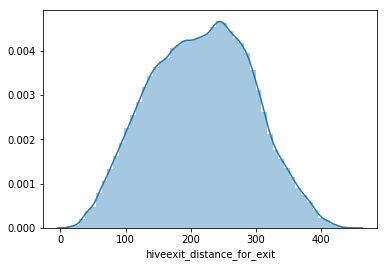

In [66]:
sns.distplot(gaps_masked.hiveexit_distance_for_exit.dropna())

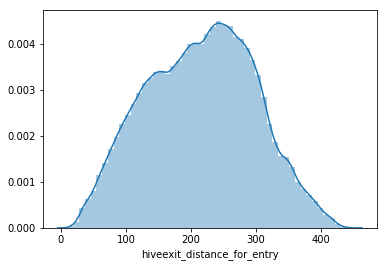

In [67]:
sns.distplot(gaps_masked.hiveexit_distance_for_entry.dropna())

In [81]:
df = gaps_masked
df = df[df.hiveexit_distance_for_exit < 50]
df = df[df.hiveexit_distance_for_entry < 50]
gaps_near_hiveexit = df

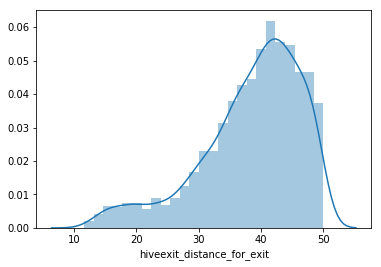

In [82]:
sns.distplot(gaps_near_hiveexit.hiveexit_distance_for_exit.dropna())

In [83]:
gaps_near_hiveexit.shape

(2243, 22)

In [80]:
gaps_near_hiveexit

,age,age_group,bee_id,cam_id_entry,cam_id_exit,entry,entry_closest_detection_timestamp,entry_frame,entry_x,entry_y,...,exit_frame,exit_x,exit_y,gap_duration,hive_side_entry,hive_side_exit,hiveexit_distance_for_entry,hiveexit_distance_for_exit,origin_for_entry,origin_for_exit
35,22.0,4,10,2,2,2016-07-20 09:51:00,2016-07-20 09:51:36.585355+00:00,14166965901911557911,112.536000,209.050800,...,14536328398503416325,28.425160,216.408500,00:11:30,1,1,119.754700,44.004302,"[0, 250]","[0, 250]"
373,22.0,4,83,2,1,2016-07-20 19:36:30,2016-07-20 19:37:12.656689+00:00,10256365806164126845,20.517270,207.074500,...,11126964939844561619,352.623400,200.836000,00:12:00,1,0,47.576853,49.233943,"[0, 250]","[350, 250]"
391,22.0,4,86,3,2,2016-07-20 14:03:00,2016-07-20 14:03:41.886058+00:00,11301437885907699629,215.682500,184.099700,...,12189398031516906583,26.784170,208.542400,00:20:00,1,1,225.525587,49.357111,"[0, 250]","[0, 250]"
623,22.0,4,127,3,1,2016-07-20 18:16:30,2016-07-20 18:16:35.070717+00:00,10900714146633251804,350.485833,225.304167,...,15675192617203627499,331.153300,214.053100,04:00:30,1,0,351.354811,40.587901,"[0, 250]","[350, 250]"
848,21.0,4,150,2,2,2016-07-20 16:05:00,2016-07-20 16:05:21.119945+00:00,9854407000310777211,116.684200,174.909200,...,15514589747140098005,16.579363,204.875300,01:15:30,1,1,138.758174,48.074045,"[0, 250]","[0, 250]"
910,21.0,4,155,2,2,2016-07-20 09:52:00,2016-07-20 09:52:24.110180+00:00,16302854157289637447,8.220207,183.499800,...,13712505478702623405,22.150140,209.764900,00:12:30,1,1,67.006331,45.929206,"[0, 250]","[0, 250]"
912,21.0,4,155,2,2,2016-07-20 10:49:30,2016-07-20 10:50:14.600595+00:00,9784345938069544635,103.599490,129.666500,...,12820095576557091045,13.278008,209.638100,00:22:30,1,1,158.786037,42.489863,"[0, 250]","[0, 250]"
1111,21.0,4,174,0,1,2016-07-20 19:37:00,2016-07-20 19:36:45.248677+00:00,12681415777302842165,85.365420,7.833643,...,15153646054796186495,338.315500,212.842500,00:17:00,0,0,358.714379,38.951346,"[350, 250]","[350, 250]"
1113,21.0,4,174,1,2,2016-07-20 21:11:00,2016-07-20 21:11:13.350997+00:00,17292701389072924109,183.095857,204.734429,...,15402437595663485556,26.416430,220.416900,01:06:30,0,1,172.933412,39.660907,"[350, 250]","[0, 250]"
1134,21.0,4,175,1,1,2016-07-20 21:19:30,2016-07-20 21:19:30.001102+00:00,13547149792136329743,343.020000,217.013000,...,15601836427278746170,343.075400,222.872500,00:30:00,0,0,33.717393,27.997345,"[350, 250]","[350, 250]"
